In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

iris = pd.read_csv("./archive/iris.csv")


In [3]:
import matplotlib.pyplot as plt

In [5]:
print(iris.shape)

(150, 6)


In [7]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [9]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

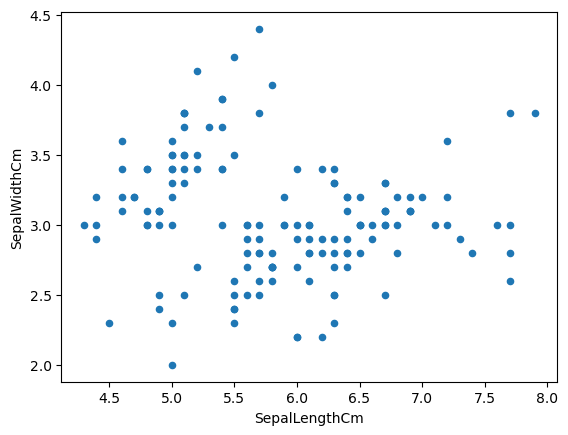

In [11]:
#2-D scatter plot:
#Always understand the axis: labels and scale.

iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
plt.show()

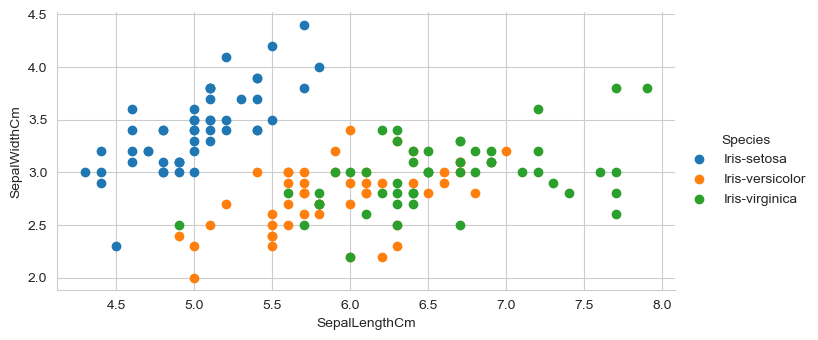

In [13]:
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue='Species', height=3.5, aspect=2) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

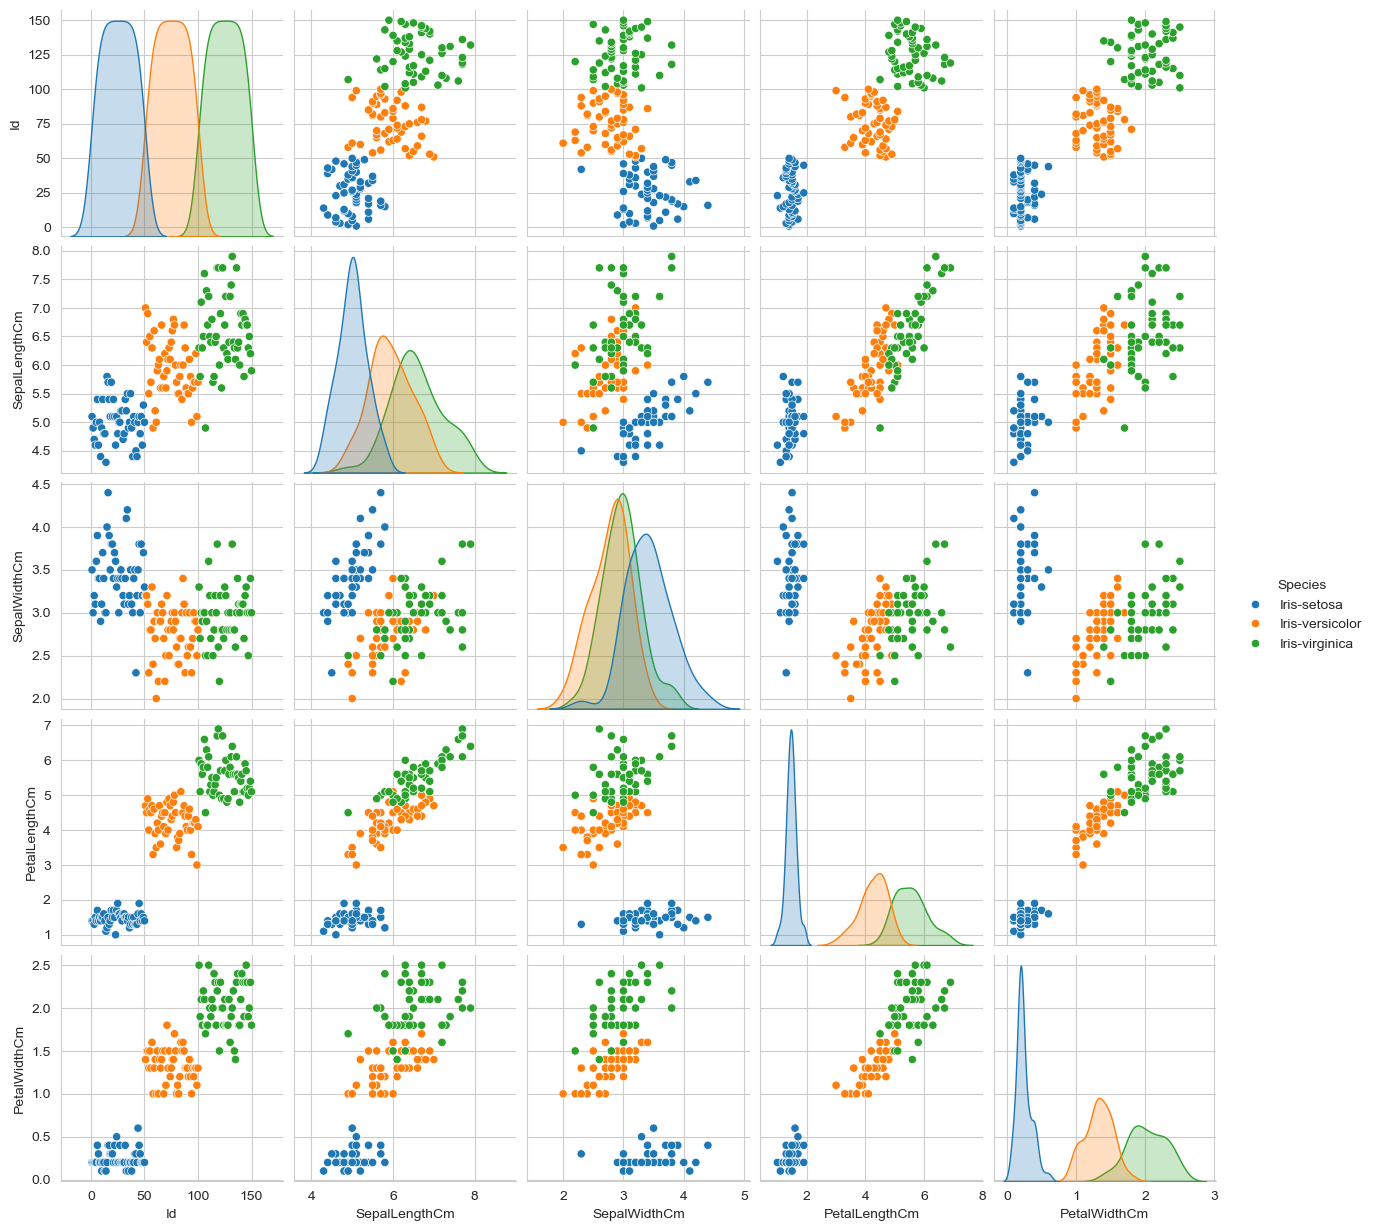

In [17]:
  # pairwise scatter plot: Pair-Plot
  # Dis.:
## Can be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-d and 4-d.
# Only possible to view 2D patterns.
plt.close()
sns.set_style("whitegrid");
sns.pairplot(iris, hue='Species')
plt.show()

## Observations
#### 1. PetalLengthCm and PetalWidthCm are the most useful features to identify various flower types.
#### 2. While Setosa can be easily identified(linearly seperable), Virginica and Versicolor have some overlap(almost linearly seperable).
#### 3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

## Histogram, PDF, CDF

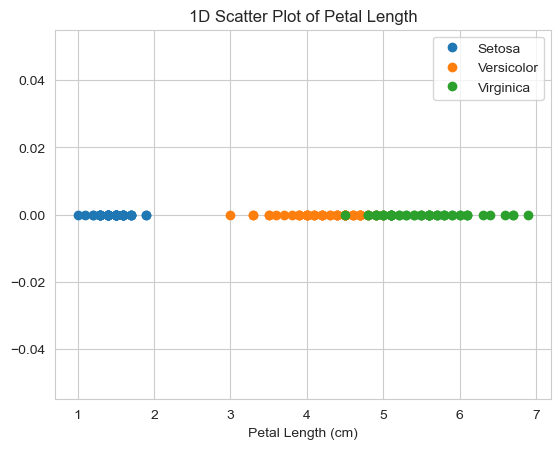

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the iris DataFrame loaded
iris_setosa = iris.loc[iris['Species'] == 'Iris-setosa']
iris_virginica = iris.loc[iris['Species'] == 'Iris-virginica']
iris_versicolor = iris.loc[iris['Species'] == 'Iris-versicolor']

# Plotting
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']), 'o', label='Setosa')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']), 'o', label='Versicolor')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']), 'o', label='Virginica')

# Adding labels and title
plt.xlabel('Petal Length (cm)')
plt.title('1D Scatter Plot of Petal Length')
plt.legend()

# Show plot
plt.show()


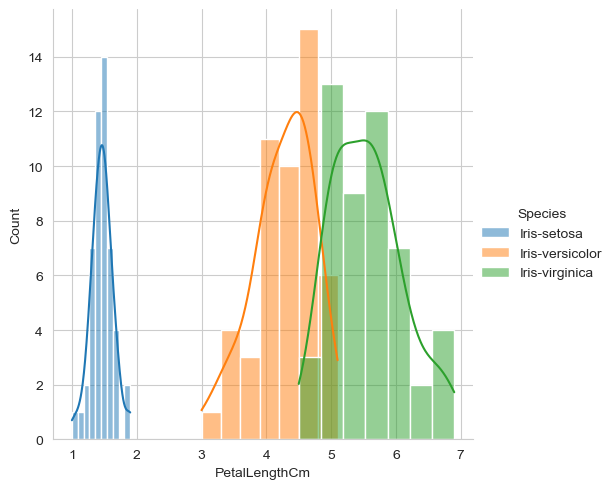

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for the distribution of PetalLengthCm
sns.FacetGrid(iris, hue='Species', height=5) \
   .map(sns.histplot, 'PetalLengthCm', kde=True) \
   .add_legend()

# Show plot
plt.show()


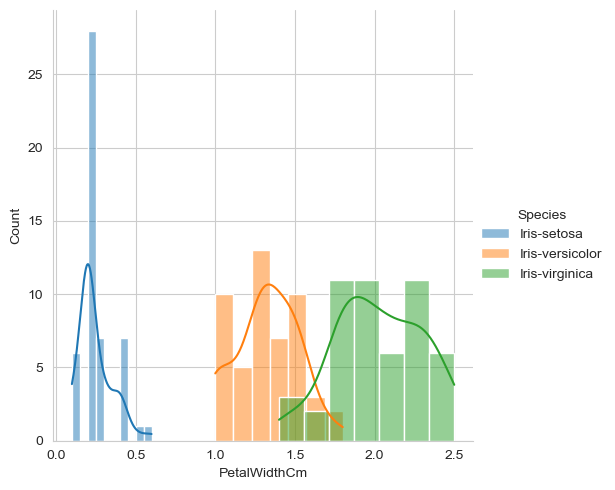

In [23]:
# Create a FacetGrid for the distribution of PetalWidthCm
sns.FacetGrid(iris, hue='Species', height=5) \
   .map(sns.histplot, 'PetalWidthCm', kde=True) \
   .add_legend()

# Show plot
plt.show()


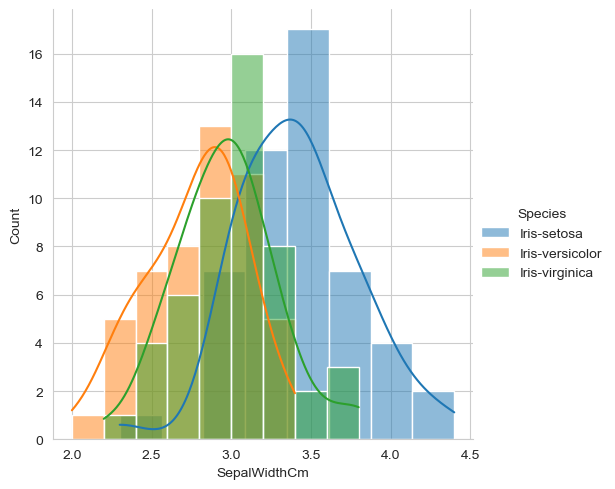

In [25]:
# Create a FacetGrid for the distribution of SepalWidthCm
sns.FacetGrid(iris, hue='Species', height=5) \
   .map(sns.histplot, 'SepalWidthCm', kde=True) \
   .add_legend()

# Show plot
plt.show()


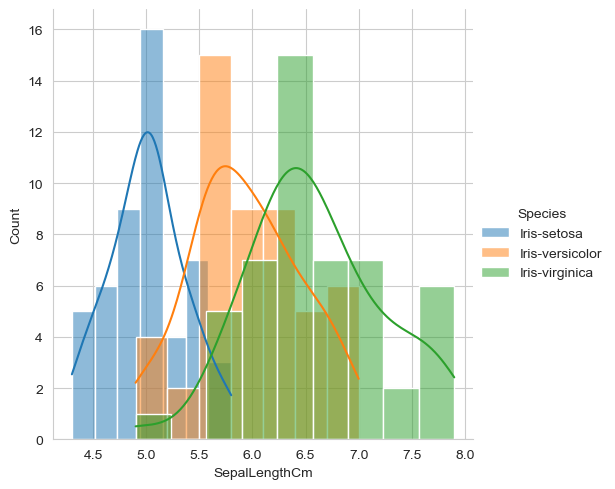

In [27]:
# Create a FacetGrid for the distribution of SepalLengthCm
sns.FacetGrid(iris, hue='Species', height=5) \
   .map(sns.histplot, 'SepalLengthCm', kde=True) \
   .add_legend()

# Show plot
plt.show()


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


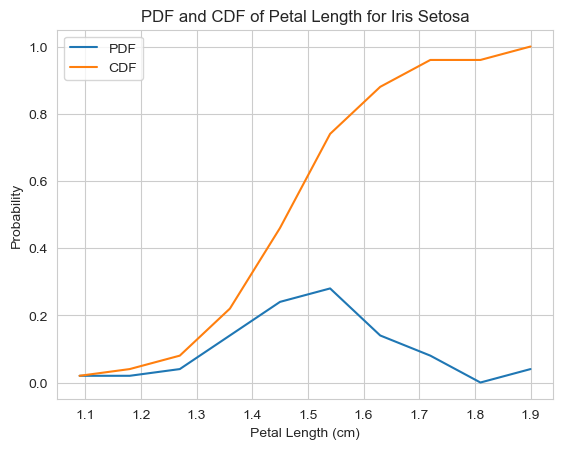

In [61]:
# Need for cumulative distribution function(CDF)
# We can visually see what percentage of versicolor flowers have a
# PetalLenghtCm of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

# Plot CDF of PetalLengthCm

# Calculate histogram and PDF
Count, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density=True)
pdf = Count * np.diff(bin_edges)
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)

# Plot PDF and CDF
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')

# Adding labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.title('PDF and CDF of Petal Length for Iris Setosa')
plt.legend()

# Show plot
plt.show()



In [43]:
# Mean, variance, std-deviation,
print("Means:")
print(np.mean(iris_setosa['PetalLengthCm']))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa['PetalLengthCm'],50)))
print(np.mean(iris_virginica['PetalLengthCm']))
print(np.mean(iris_versicolor['PetalLengthCm']))

print('\nStd-dev:')
print(np.std(iris_setosa['PetalLengthCm']))
print(np.std(iris_virginica['PetalLengthCm']))
print(np.std(iris_versicolor['PetalLengthCm']))

print('\nVar:')
print(np.var(iris_setosa['PetalLengthCm']))
print(np.var(iris_virginica['PetalLengthCm']))
print(np.var(iris_versicolor['PetalLengthCm']))



Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204

Var:
0.02950400000000001
0.2984960000000002
0.21640000000000012


In [57]:
# Median, Quartiles, Percentiles, IQR.
print('\nMedians:')
print(np.median(iris_setosa['PetalLengthCm']))
#Median with an outlier
print(np.median(np.append(iris_setosa['PetalLengthCm'],50)))
print(np.median(iris_virginica['PetalLengthCm']))
print(np.median(iris_versicolor['PetalLengthCm']))

print('\nQuantiles:')
print(np.percentile(iris_setosa['PetalLengthCm'],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica['PetalLengthCm'],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor['PetalLengthCm'],np.arange(0, 100, 25)))

print('\n90th Percetiles:')
print(np.percentile(iris_setosa['PetalLengthCm'],90))
print(np.percentile(iris_virginica['PetalLengthCm'],90))
print(np.percentile(iris_versicolor['PetalLengthCm'],90))

from statsmodels import robust
print ('\nMedian Absolute Deviation')
print(robust.mad(iris_setosa['PetalLengthCm']))
print(robust.mad(iris_virginica['PetalLengthCm']))
print(robust.mad(iris_versicolor['PetalLengthCm']))




Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percetiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


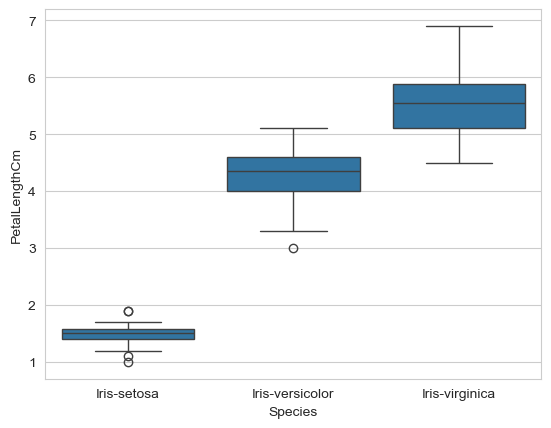

In [63]:
# Box-plot with whiskers: another method of visualizing the 1-D scatter plot
# The concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: (no standard way) Could use min and max or use other 
# IQR like idea.

# NOTE: In the plot below, a technique call inter-quartilr range is used in 
# Whiskers in the plot below donot corresposnd to the min and max values.

# Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.show()


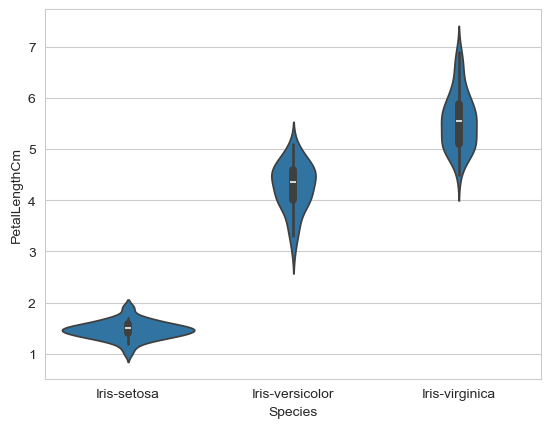

In [67]:
# A violin plot combines the benefit of the previous two plots
# and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner
#in a violin plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot for PetalLengthCm by Species
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

# Show the plot
plt.show()


C:\Users\vatsa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


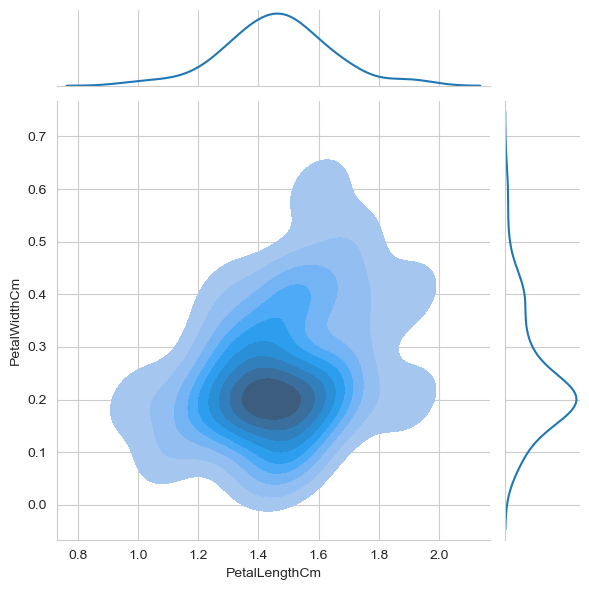

In [94]:
# 2D Density plot contors-plot
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_setosa, kind="kde", shade=True)
plt.show()